In [1]:
using PyPlot, JLD2

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Warning: Replacing module `DataStructures`
└ @ Base loading.jl:942


In [2]:
@load "ex4_data.jld2"

16-element Array{Symbol,1}:
 :received_data    
 :c                
 :c_true           
 :rho              
 :Nx               
 :Ny               
 :h                
 :Fs               
 :Nt               
 :dt               
 :t                
 :source           
 :source_position  
 :receiver_position
 :pml_len          
 :pml_coef         

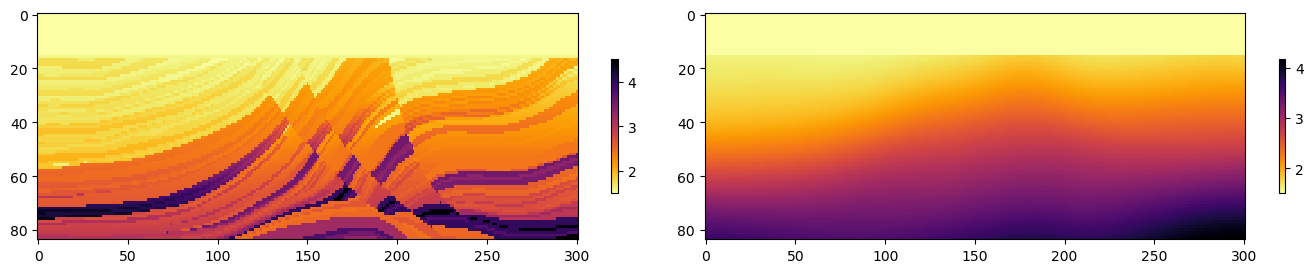

In [29]:
figure(figsize=(14,7))
subplot(121)
imshow(c_true, cmap="inferno_r", aspect=1.5); colorbar(shrink=0.2)
subplot(122)
imshow(c, cmap="inferno_r", aspect=1.5); colorbar(shrink=0.2)
# clim(-0.05,0.05)

tight_layout()

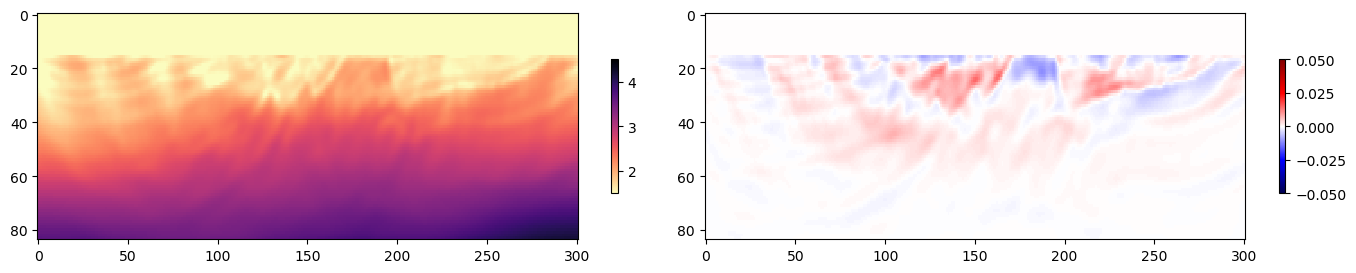

In [96]:
@load  "temp_data/data_iter_30.jld2"

x2 = copy(xk);
figure(figsize=(14,7))
subplot(121)
imshow(reshape(x2,Nx,Ny), cmap="magma_r", aspect=1.5); colorbar(shrink=0.2); clim(1.5,4.5)
subplot(122)
imshow(1e-5reshape(gradk,Nx,Ny), cmap="seismic", aspect=1.5); colorbar(shrink=0.2)
clim(-0.05,0.05)

tight_layout()

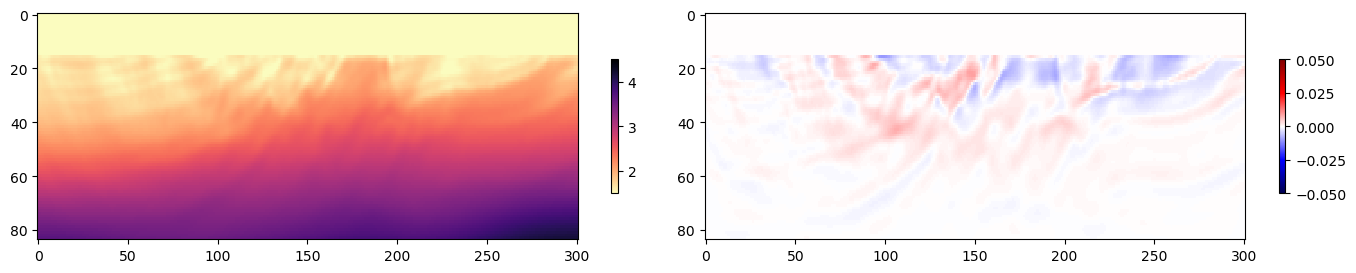

In [94]:
@load  "temp_data/ot_new_21-40/data_iter_6.jld2"
# @load  "temp_data/data_iter_2.jld2"

x1 = copy(xk);
figure(figsize=(14,7))
subplot(121)
imshow(reshape(x1,Nx,Ny), cmap="magma_r", aspect=1.5); colorbar(shrink=0.2); clim(1.5,4.5)
subplot(122)
imshow(1e-5reshape(update_direction,Nx,Ny), cmap="seismic", aspect=1.5); colorbar(shrink=0.2)
clim(-0.05,0.05)

tight_layout()

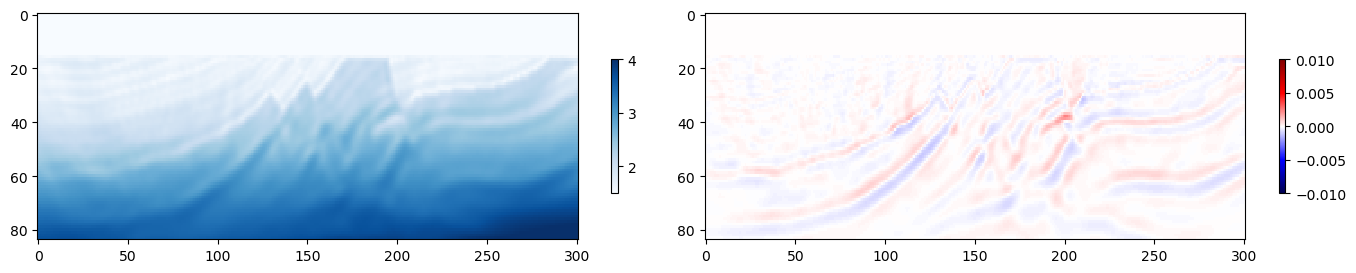

In [281]:
@load  "temp_data/data_iter_40.jld2"

x2 = copy(xk);
figure(figsize=(14,7))
subplot(121)
imshow(reshape(x2,Nx,Ny), cmap="Blues", aspect=1.5); colorbar(shrink=0.2); clim(1.5,4)
subplot(122)
imshow(1e-8reshape(update_direction,Nx,Ny), cmap="seismic", aspect=1.5); colorbar(shrink=0.2)
clim(-0.01,0.01)

tight_layout()

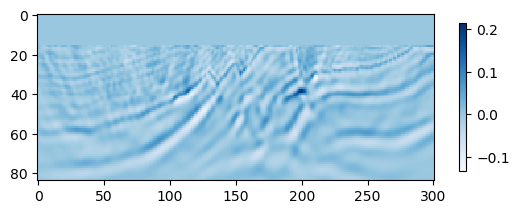

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa7645f0810>

In [282]:
imshow(reshape(x1-x2,Nx,Ny), cmap="Blues", aspect=1.5); colorbar(shrink=0.4)

In [170]:
Ny

301

In [78]:
diff_ot = zeros(120)
diff_l2 = zeros(120)

for iter = 1:20
    file_name = "temp_data/ot_new_1-20/data_iter_" * string(iter) * ".jld2"
    xxx = load(file_name, "xk")
    diff_ot[iter] = norm(xxx-c_true[:],2)
end

for iter = 21:40
    file_name = "temp_data/ot_new_21-40/data_iter_" * string(iter-20) * ".jld2"
    xxx = load(file_name, "xk")
    diff_ot[iter] = norm(xxx-c_true[:],2)
end

for iter = 41:80
    file_name = "temp_data/ot_new_41-80/data_iter_" * string(iter-40) * ".jld2"
    xxx = load(file_name, "xk")
    diff_ot[iter] = norm(xxx-c_true[:],2)
end

for iter = 81:120
    file_name = "temp_data/ot_new_81-120/data_iter_" * string(iter-80) * ".jld2"
    xxx = load(file_name, "xk")
    diff_ot[iter] = norm(xxx-c_true[:],2)
end

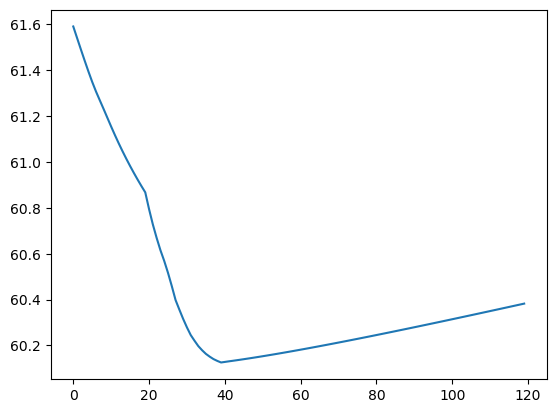

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efd3c3e6410>

In [80]:
plot(diff_ot)

In [81]:
diff_ot = zeros(120)
diff_l2 = zeros(120)

for iter = 1:20
    file_name = "temp_data/l2_new_1-20/data_iter_" * string(iter) * ".jld2"
    xxx = load(file_name, "xk")
    diff_l2[iter] = norm(xxx-c_true[:],2)
end

for iter = 21:40
    file_name = "temp_data/l2_new_21-40/data_iter_" * string(iter-20) * ".jld2"
    xxx = load(file_name, "xk")
    diff_l2[iter] = norm(xxx-c_true[:],2)
end

for iter = 41:80
    file_name = "temp_data/l2_new_41-80/data_iter_" * string(iter-40) * ".jld2"
    xxx = load(file_name, "xk")
    diff_l2[iter] = norm(xxx-c_true[:],2)
end


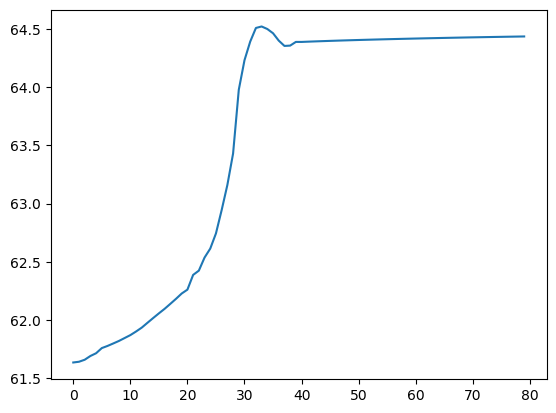

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efd1d8c97d0>

In [83]:
plot(diff_l2[1:80])

In [62]:
using FileIO, LinearAlgebra
iter=3
file_name = "temp_data/data_iter_" * string(iter) * ".jld2"
xxx = load(file_name, "xk")

25284×1 Array{Float64,2}:
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 1.5               
 ⋮                 
 3.725843315021823 
 3.7738227117911496
 3.8188726547820253
 3.863116267435886 
 3.906161416256785 
 3.9481474406526162
 3.988271831814081 
 4.027515392444221 
 4.065357440110508 
 4.1015890716076395
 4.1361181291021385
 4.167795583830181 

In [57]:
import Pkg; Pkg.add("FileIO")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %                            ]  29.1 %Fetching: [=================>                       ]  41.7 %>                  ]  54.1 %Fetching: [==========================>              ]  63.0 %>         ]  75.4 %====================================>    ]  88.0 % Resolving package versions...
 Installed CompilerSupportLibraries_jll ─ v0.2.0+1
 Installed Parsers ────────────────────── v0.3.12
 Installed PaddedViews ────────────────── v0.5.3
 Installed OffsetArrays ───────────────── v1.0.3
 Installed PyCall ─────────────────────── v1.91.4
 Installed DataStructures ─────────────── v0.17.10
 Installed StatsBase ──────────────────── v0.32.2
 Installed FileIO ─────────────────────── v1.2.3
 Installed ZeroMQ_jll ─────────────────── v4.3.2+1
 Installed OpenSpecFun_jll ────────────── v0.5.3+3
 Installed FFTW_jll ────